

1. Data Uploading: Load the dataset and display summary statistics

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path = '/content/Loan Prediction.csv'
data = pd.read_csv(file_path)
print(data.head())

print("Summary Statistics:")
print(data.describe())

print("\nDataset Info:")
print(data.info())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

2. Data Visualization: Visualize the relationship between "ApplicantIncome" and "Loan_Status"



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

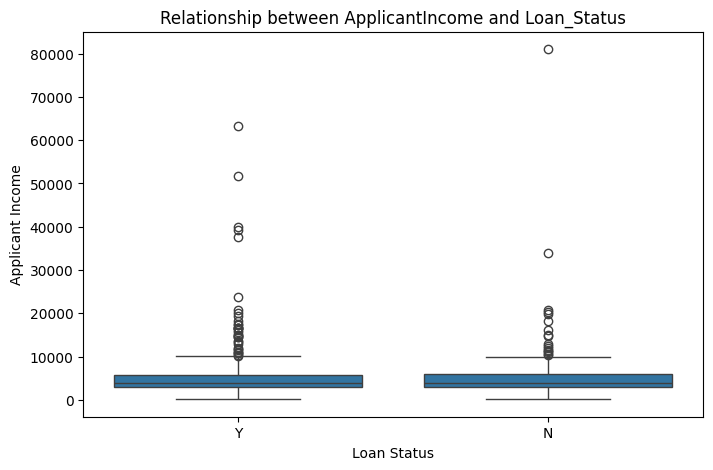

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=data)
plt.title("Relationship between ApplicantIncome and Loan_Status")
plt.xlabel("Loan Status")
plt.ylabel("Applicant Income")
plt.show()

3. Data Analysis: Analyze feature importance using correlation or feature selection

In [ ]:
data_encoded = data.copy()
data_encoded["Loan_Status"] = data_encoded["Loan_Status"].map({"Y": 1, "N": 0})
numerical_columns = data_encoded.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = data_encoded[numerical_columns].corr()
print("Correlation of numerical features with Loan_Status:")
print(correlation_matrix["Loan_Status"].sort_values(ascending=False))


Correlation of numerical features with Loan_Status:
Loan_Status          1.000000
Credit_History       0.561678
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.021268
LoanAmount          -0.037318
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64


4. Handling Missing Values

In [ ]:
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())
categorical_columns = data.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

print("Missing values handled.")
print(data.isnull().sum())

Missing values handled.
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-30-109adbce33f3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)




5. Model Training and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

AUC-ROC Score: 0.7755813953488372


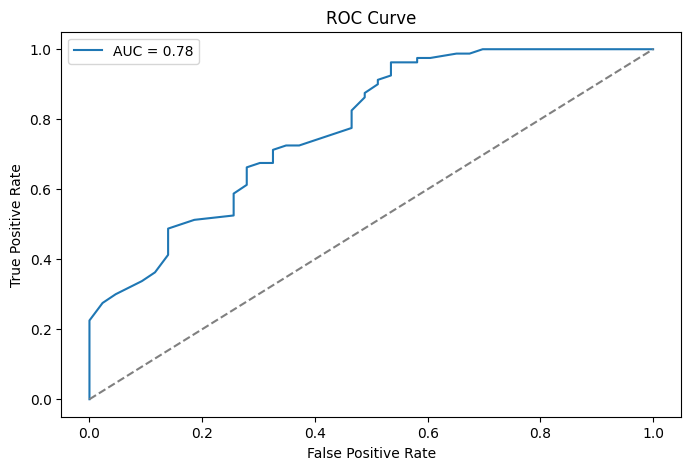

In [ ]:
X = data.drop(columns=["Loan_ID", "Loan_Status"])
X = pd.get_dummies(X, drop_first=True)
y = data["Loan_Status"].map({"Y": 1, "N": 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {auc_score}")

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()